In [ ]:
import pandas as pd
import numpy as np
import librosa.display
import librosa
import os
import xlsxwriter
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# Acoustic mean value of same- same speaker

In [80]:
PATH = '/home/josearangos/Documentos/UdeA/2019-2/PI2/Utilities/Resources/Audios_Euclidean_Distance/'
entries = os.listdir(PATH)

In [98]:
speaker = []
AMMfccs = []

juan = []
gabriel = []
jose = []
leo = []
angelower = []
carlos = []

indexs = []

for file_path in entries:
    file_name_array = file_path.split('_')
    name = file_name_array[0]
    x , sr = librosa.load(PATH+file_path)
    x, index = librosa.effects.trim(x) #  Trim leading and trailing silence from an audio signal.
    x_normalize=sk.preprocessing.minmax_scale(x, axis=0) # Normalizamos
    mfccs = librosa.feature.mfcc(x_normalize, sr=sr,n_mfcc=12,hop_length=int(0.010*sr), n_fft=int(0.025*sr))    
    mean_horizontal = np.mean(mfccs,axis=1) 
    mean_vertial = np.mean(mean_horizontal,axis=0)   
    AMMfccs.append(mean_vertial)
    indexs.append(file_name_array[1])
    speaker.append(name)   
    

In [99]:
AMMfccs = np.multiply(AMMfccs,-1)

In [102]:
df = pd.concat([pd.DataFrame(speaker),pd.DataFrame(indexs),pd.DataFrame(AMMfccs)],axis=1)

In [103]:
df

,0,0,0
0,Carlos,2.wav,10.858403
1,jose,4.wav,9.250699
2,angelower,2.wav,9.150106
3,gabriel,3.wav,12.863360
4,angelower,3.wav,8.495023
5,Juan,1.wav,13.809867
6,jose,5.wav,11.500996
7,Juan,3.wav,14.315095
8,Leon,5.wav,12.019389
9,Leon,2.wav,13.187751


In [104]:
writer = pd.ExcelWriter('sounds_MFCCs.xlsx', engine='xlsxwriter')
df.to_excel(writer,sheet_name='welcome',index=False)
writer.save()

## Euclidean distance value

In [109]:
path_mfcc = '/home/josearangos/Documentos/UdeA/2019-2/PI2/Utilities/Sobre Similitud entre speakers.xlsx'
sheet_name= 'Results'

In [110]:
df_mfcc = pd.read_excel(path_mfcc,sheet_name)

In [111]:
df_mfcc

,Speaker,Sound 1,Sound 2,Sound 3,Sound 4,Sound 5
0,Angelower,7.699938,9.150106,8.495023,10.257472,8.777735
1,Jose,8.280445,10.495723,11.742607,9.250699,11.500996
2,Leo,11.820014,13.187751,11.894507,12.082593,12.019389
3,Gabriel,10.397641,11.592706,12.863360,12.195230,11.597299
4,Carlos,9.101964,10.858403,11.649968,13.586510,11.321918
5,Juan_Arango,13.809867,14.223366,14.315095,13.952244,11.888535


In [123]:
def euclidean_distance(n,m):
    return np.absolute(n-m)

In [124]:
columns = df_mfcc.columns

In [125]:
columns

Index(['Speaker', 'Sound 1', 'Sound 2', 'Sound 3', 'Sound 4', 'Sound 5'], dtype='object')

### Distancia euclidiana para todos los  sounds

In [127]:
speakers = df_mfcc[columns[0]]
mffcc_sound_1 = df_mfcc[columns[1]]
mffcc_sound_1_1 = df_mfcc[columns[1]]

In [135]:
speakers_1 = []
speakers_2 = []
de = []

dfs = []

for k in range(1,6):
    mffcc_sound_1 = df_mfcc[columns[k]]
    mffcc_sound_1_1 = df_mfcc[columns[k]]
    speakers_1 = []
    speakers_2 = []
    de = []
    for i in range(len(mffcc_sound_1)):
        n = mffcc_sound_1[i]
        speaker_1 = speakers[i]
        for j in range(len(mffcc_sound_1_1)):
            m =mffcc_sound_1_1[j]
            speaker_2 = speakers[j]
            d =euclidean_distance(n,m)
            speakers_1.append(speaker_1)
            speakers_2.append(speaker_2)
            de.append(d)
    # un sound
    df = pd.concat([pd.DataFrame(speakers_1),pd.DataFrame(speakers_2),pd.DataFrame(de)],axis=1)
    dfs.append(df)

In [145]:
writer = pd.ExcelWriter('Euclidean_Distance_sound_5.xlsx', engine='xlsxwriter')
dfs[4].to_excel(writer,sheet_name='welcome',index=False)
writer.save()

## Confusion Matrix by sound

In [294]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=12):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt=".2f")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=30, ha='right', fontsize=fontsize)
    plt.ylabel('Acoustic mean value speaker MFCC')
    plt.xlabel('Acoustic mean value speaker MFCC')
    #return fig

In [305]:
path_ed_sounds = '/home/josearangos/Documentos/UdeA/2019-2/PI2/Utilities/Euclidean_Distance/ED_By_Sound.xlsx'

def print_confusion_matrix_by_sound(sheet_name):
    df_ed_sound = pd.read_excel(path_ed_sounds,sheet_name)
    print(df_ed_sound)
    class_names = list(df_ed_sound['Speaker'])
    df_ed_sound = df_ed_sound.iloc[:,1:]
    confusion_matrix = df_ed_sound.values
    print_confusion_matrix(confusion_matrix, class_names)

## Sound 1

       Speaker  Angelower      Jose       Leo   Gabriel    Carlos  Juan_Arango
0    Angelower   0.000000  0.580507  4.120076  2.697703  1.402026     6.109929
1         Jose   0.580507  0.000000  3.539569  2.117196  0.821519     5.529422
2          Leo   4.120076  3.539569  0.000000  1.422373  2.718050     1.989853
3      Gabriel   2.697703  2.117196  1.422373  0.000000  1.295677     3.412226
4       Carlos   1.402026  0.821519  2.718050  1.295677  0.000000     4.707903
5  Juan_Arango   6.109929  5.529422  1.989853  3.412226  4.707903     0.000000


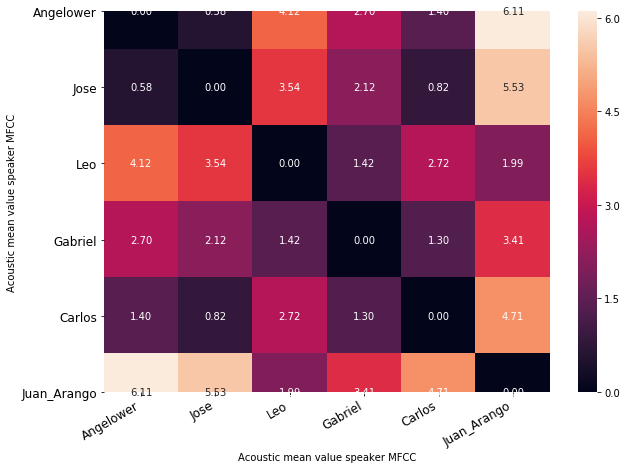

In [306]:
print_confusion_matrix_by_sound('EDSound1')

## Sound 2

       Speaker  Angelower      Jose       Leo   Gabriel    Carlos  Juan_Arango
0    Angelower   0.000000  1.345616  4.037644  2.442599  1.708297     5.073259
1         Jose   1.345616  0.000000  2.692028  1.096983  0.362680     3.727643
2          Leo   4.037644  2.692028  0.000000  1.595045  2.329348     1.035615
3      Gabriel   2.442599  1.096983  1.595045  0.000000  0.734303     2.630660
4       Carlos   1.708297  0.362680  2.329348  0.734303  0.000000     3.364963
5  Juan_Arango   5.073259  3.727643  1.035615  2.630660  3.364963     0.000000


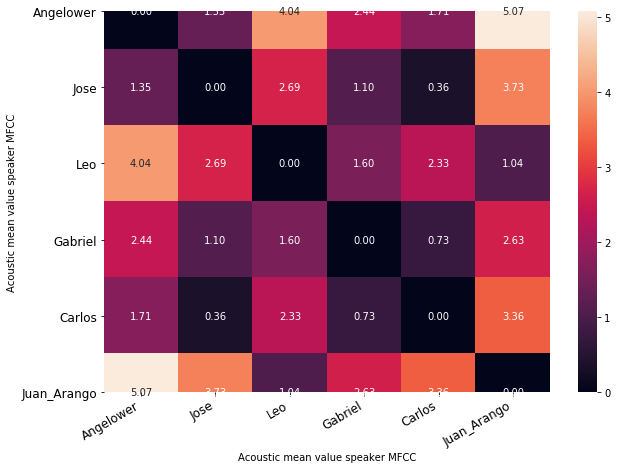

In [308]:
print_confusion_matrix_by_sound('EDSound2')

## Sound 3

       Speaker  Angelower      Jose       Leo   Gabriel    Carlos  Juan_Arango
0    Angelower   0.000000  3.247584  3.399485  4.368338  3.154945     5.820072
1         Jose   3.247584  0.000000  0.151900  1.120753  0.092639     2.572488
2          Leo   3.399485  0.151900  0.000000  0.968853  0.244539     2.420588
3      Gabriel   4.368338  1.120753  0.968853  0.000000  1.213392     1.451735
4       Carlos   3.154945  0.092639  0.244539  1.213392  0.000000     2.665127
5  Juan_Arango   5.820072  2.572488  2.420588  1.451735  2.665127     0.000000


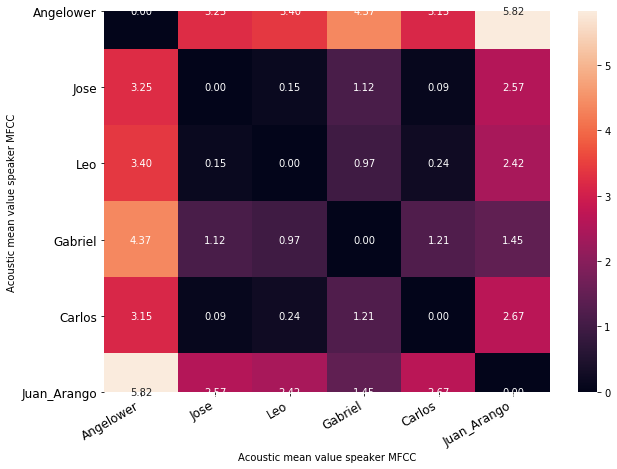

In [309]:
print_confusion_matrix_by_sound('EDSound3')

## Sound 4

       Speaker  Angelower      Jose       Leo   Gabriel    Carlos  Juan_Arango
0    Angelower   0.000000  1.006773  1.825121  1.937757  3.329038     3.694772
1         Jose   1.006773  0.000000  2.831894  2.944530  4.335811     4.701545
2          Leo   1.825121  2.831894  0.000000  0.112637  1.503917     1.869651
3      Gabriel   1.937757  2.944530  0.112637  0.000000  1.391280     1.757014
4       Carlos   3.329038  4.335811  1.503917  1.391280  0.000000     0.365734
5  Juan_Arango   3.694772  4.701545  1.869651  1.757014  0.365734     0.000000


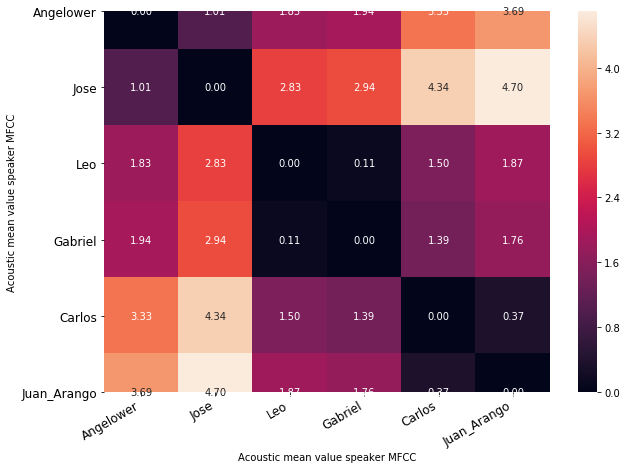

In [310]:
print_confusion_matrix_by_sound('EDSound4')

## Sound 5

       Speaker  Angelower      Jose       Leo   Gabriel    Carlos  Juan_Arango
0    Angelower   0.000000  2.723261  3.241654  2.819564  2.544183     3.110800
1         Jose   2.723261  0.000000  0.518394  0.096303  0.179078     0.387539
2          Leo   3.241654  0.518394  0.000000  0.422091  0.697472     0.130855
3      Gabriel   2.819564  0.096303  0.422091  0.000000  0.275381     0.291236
4       Carlos   2.544183  0.179078  0.697472  0.275381  0.000000     0.566617
5  Juan_Arango   3.110800  0.387539  0.130855  0.291236  0.566617     0.000000


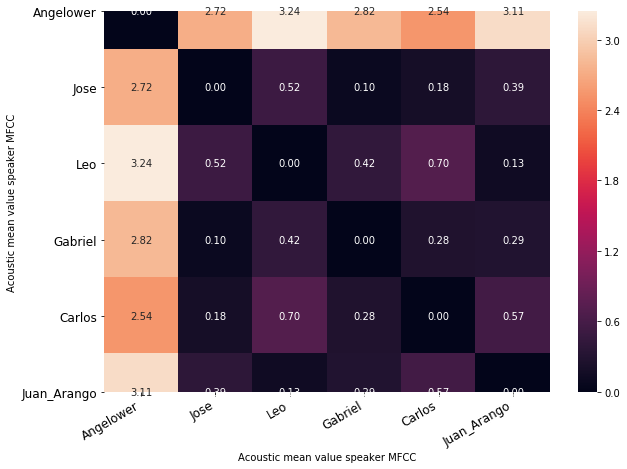

In [311]:
print_confusion_matrix_by_sound('EDSound5')